# 1. praktiskais darbs

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 1. uzdevums


Spiediena sadalījuma formula:
$$ p(r, \varphi) = \rho \cdot \left[ \left( R - r \cdot \sin(\varphi) \right) \cdot g + \frac{\omega_\varphi^2 r^2}{2}  \right] $$

Statiskā gadījumā (nenotiek rotācija) $ \omega_\varphi = 0 $. Tātad vienādojumu pārrakstot:
$$ p(r, \varphi) = \rho \cdot \left[ \left( R - r \cdot \sin(\varphi) \right) \cdot g + {\frac{0^2 r^2}{2}}  \right] $$
$$ p(r, \varphi) = \rho  g \cdot \left( R - r \cdot \sin(\varphi) \right) $$

Salīdzinot ar hidrostatiskā spiediena formulu $ p = \rho g H $, $\rho$ un $g$ sakrīt, tātad $H$ jābūt vienādam ar $ R - r \cdot \sin(\varphi)$. Dekarta koordinātu sistēmā $ H = R - y $ (skatīt 1. attēlu) . Pārejot uz polāro koordinātu sistēmu $ y = r \cdot \sin(\varphi)$. Ievietojot iekšā $H = R - r\cdot \sin(\varphi)$, tātad formula (15) tik tiešām statiskā gadījumā atbilst hidrostatiskā spiediena formulai.

<br>

<center><img src="1att.png" alt="1. attēls" width="500"/></center>
<p style="text-align:center">1. attēls</p>

## 2. uzdevums
Ātruma komponentes:
$$ \left\{ \begin{array}{cl}
v_\varphi(r)\ =  \omega_\varphi r \\
v_r \ \ = 0
\end{array} \right. $$

Izmantojot diverģences definīciju polārajās koordinātās
$$ \nabla \cdot v = \frac{1}{r} \frac{\partial(r v_r)}{\partial r} + \frac{1}{r} \frac{\partial v_\varphi}{\partial \varphi} = 0$$

Tā kā ātruma diverģence ir 0, un šķidrums ir nesaspiežams ($ \rho = const $), nepārtrauktības nosacījums izpildās. Tas ir loģiski, jo sistēmā neizplūst un neieplūst jauns sķidrums.

## 3. uzdevums

<br>
Konstantes un kopīgās funkcijas

In [2]:
G = 9.81  # m/s^2
RHO = 1000  # kg/m^3
RADIUS = 0.2  # m
R = np.linspace(0, RADIUS, 5)  # m
PHI = np.linspace(0, 2 * np.pi, 17)  # rad

r, phi = np.meshgrid(R, PHI)

n = np.array([i for i in range(0, 300 + 1, 50)])  # apgriezieni/min
OMEGA = n * 2 * np.pi / 60  # leņķiskais ātrums, rad/s


def polar_to_cartesian(r_hat, phi, phi_hat):
    """plt.quiver arī polārajā koordinātu sistēmā pieprasa x un y komponentes. Šī funkcija nomaina polāros vienības vektorus uz Dekarta vienības vektoriem"""
    x_hat = r_hat * np.cos(phi) - phi_hat * np.sin(phi)
    y_hat = r_hat * np.sin(phi) + phi_hat * np.cos(phi)
    return x_hat, y_hat

<br>
a) Vektora $\textbf{g}$ sadalījums

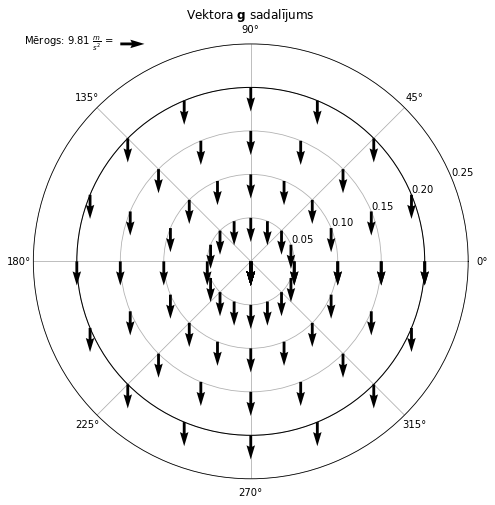

In [3]:
def g(r, phi):
    """Atgriež gravitācijas lauka vektoru g(r, phi) kādā punktā polārajā koordinātu sistēmā"""
    return -G * np.sin(phi), -G * np.cos(phi)


g_r, g_phi = g(r, phi)
g_x, g_y = polar_to_cartesian(g_r, phi, g_phi)

fig = plt.figure(figsize=(8, 8))
fig.tight_layout()
ax = fig.add_subplot(111, polar=True)

ax.set_ylim([0, 0.25])
ax.grid(True)
ax.set_axisbelow(True)

ax.set_title(r"Vektora $\mathbf{g}$ sadalījums")
q = ax.quiver(phi, r, g_x, g_y)
ax.quiverkey(q, X=0.2, Y=1, U=G,
             label=fr" Mērogs: {G} $\frac{{m}}{{s^2}}$ =", labelpos='W')

disk = plt.Circle((0, 0), 0.2, color='black', transform=ax.transData._b, fill=False)
ax.add_patch(disk)

plt.show()


<br>
b) Vektora $\textbf{v}$ sadalījums

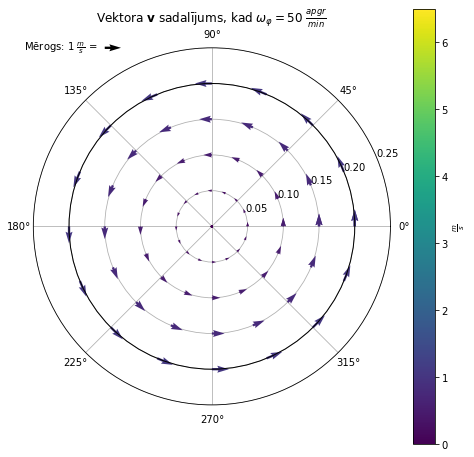

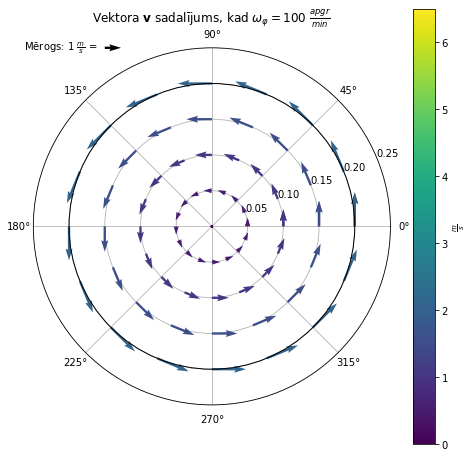

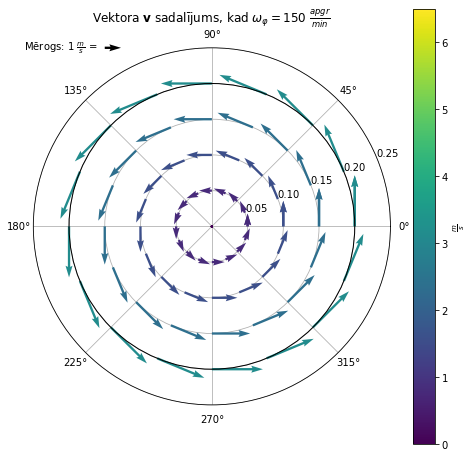

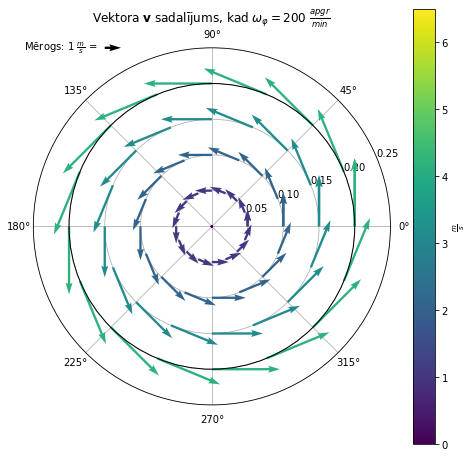

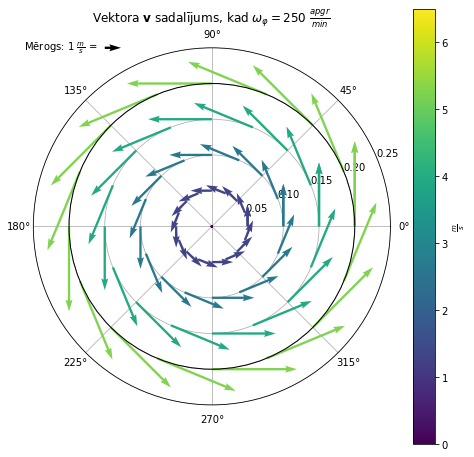

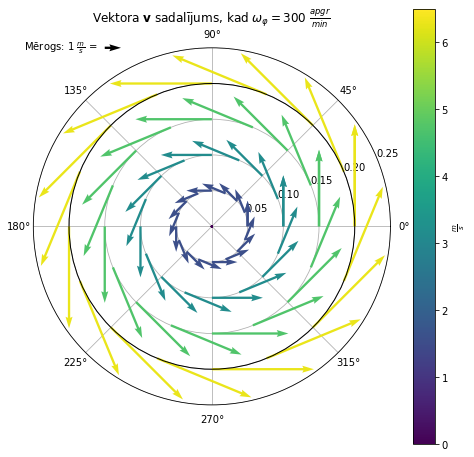

In [4]:
def v(r, phi, omega):
        """Atgriež ātruma lauka vektoru v(r, phi) kādā punktā polārajā koordinātu sistēmā"""
        return 0, omega*r


for idx, o in enumerate(OMEGA[1:]):
    v_r, v_phi = v(r, phi, o)
    v_x, v_y = polar_to_cartesian(v_r, phi, v_phi)


    fig = plt.figure(figsize=(8, 8))
    fig.tight_layout()
    ax = fig.add_subplot(111, polar=True)

    ax.set_ylim([0, 0.25])
    ax.grid(True)
    ax.set_axisbelow(True)

    norm = mpl.colors.Normalize(vmin=0., vmax=6.5)

    ax.set_title(fr"Vektora $\mathbf{{v}}$ sadalījums, kad $\omega_\varphi = {n[idx+1]} \ \frac{{apgr}}{{min}}$")
    q = ax.quiver(phi, r, v_x, v_y, np.hypot(v_x, v_y), scale = 22, cmap="viridis", norm=norm)
    ax.quiverkey(q, X=0.2, Y=1, U=1,
                 label=fr" Mērogs: {1} $\frac{{m}}{{s}}$ =", labelpos='W')
    cbar = fig.colorbar(q)
    cbar.set_label(r"$\frac{m}{s}$")

    disk = plt.Circle((0, 0), 0.2, color='black', transform=ax.transData._b, fill=False)
    ax.add_patch(disk)

    plt.show()

c) Skalārā lauka p sadalījums

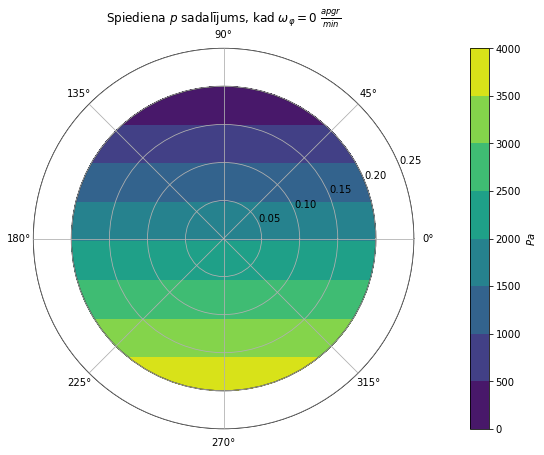

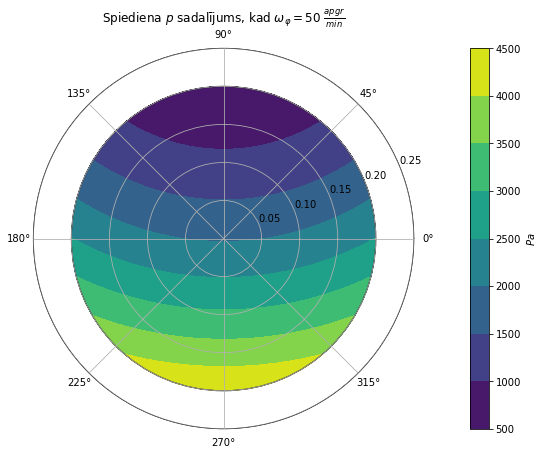

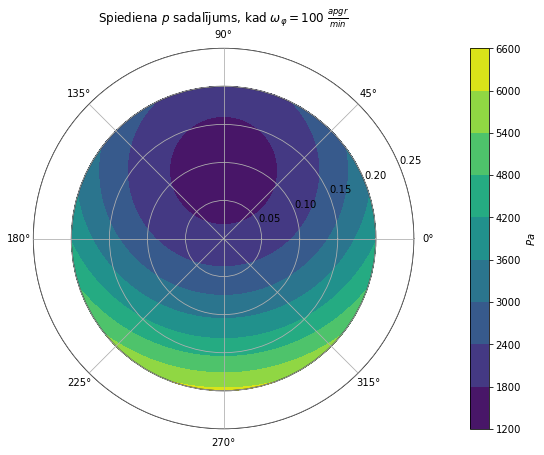

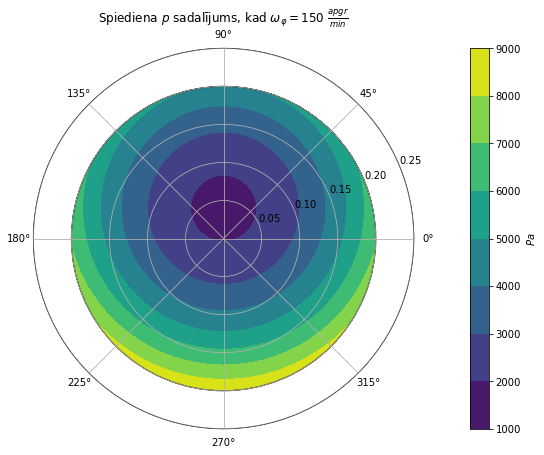

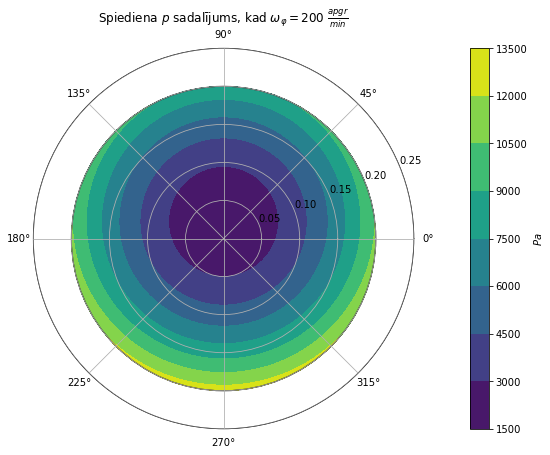

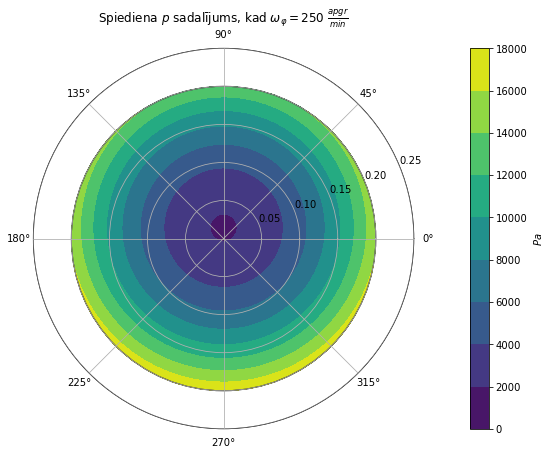

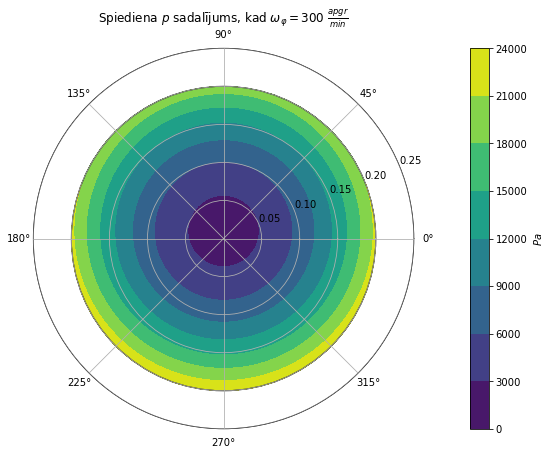

In [5]:
def pressure(r, phi, omega):
    p = RHO * ((RADIUS - r * np.sin(phi)) * G + (omega ** 2 * r ** 2) / 2)
    return p


pressures = []
for idx, o in enumerate(OMEGA):
    R = np.linspace(0, RADIUS, 80)  # m
    PHI = np.linspace(0, 2 * np.pi, 180)  # rad
    r, phi = np.meshgrid(R, PHI)

    p = pressure(r, phi, o)
    pressures.append(p)


    fig = plt.figure(figsize=(10, 7))
    fig.tight_layout()
    ax = fig.add_subplot(111, polar=True)

    ax.set_ylim([0, 0.25])
    ax.grid(True)
    ax.set_axisbelow(False)
    
    ax.set_title(fr"Spiediena $p$ sadalījums, kad $\omega_\varphi = {n[idx]} \ \frac{{apgr}}{{min}}$")

    contour = ax.contourf(phi, r, p)
    cbar = fig.colorbar(contour, pad=0.1)
    cbar.set_label(r"$Pa$")

    disk = plt.Circle((0, 0), 0.2, color='black', transform=ax.transData._b, fill=False)
    ax.add_patch(disk)

    plt.show()


<br>
d) Spiediena gradients $\nabla p$

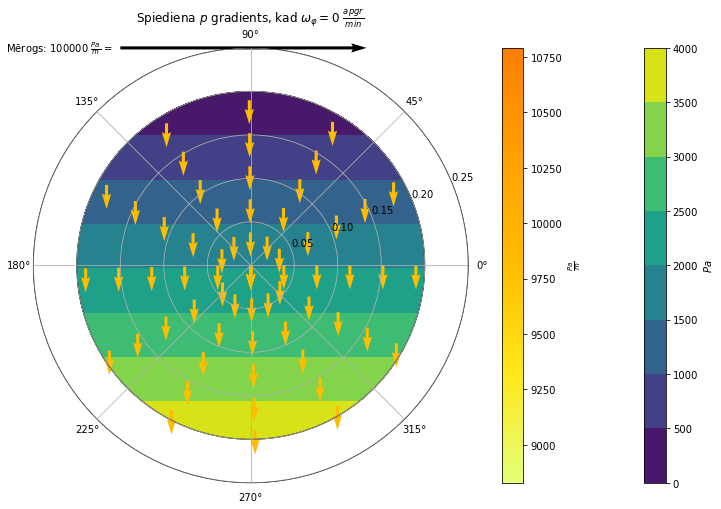

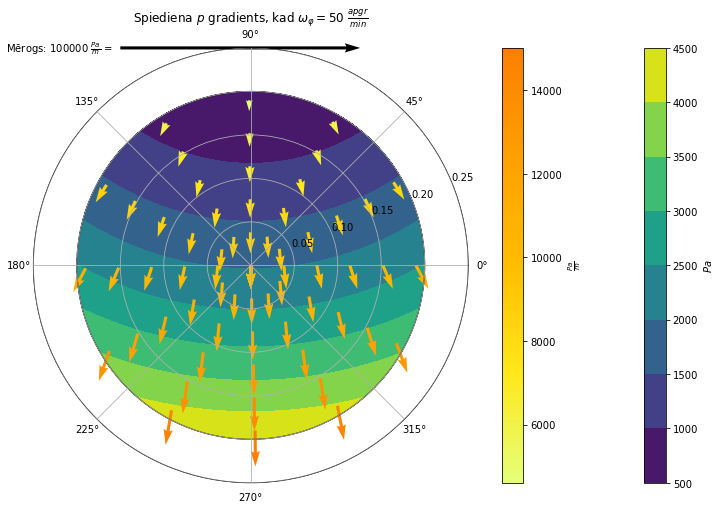

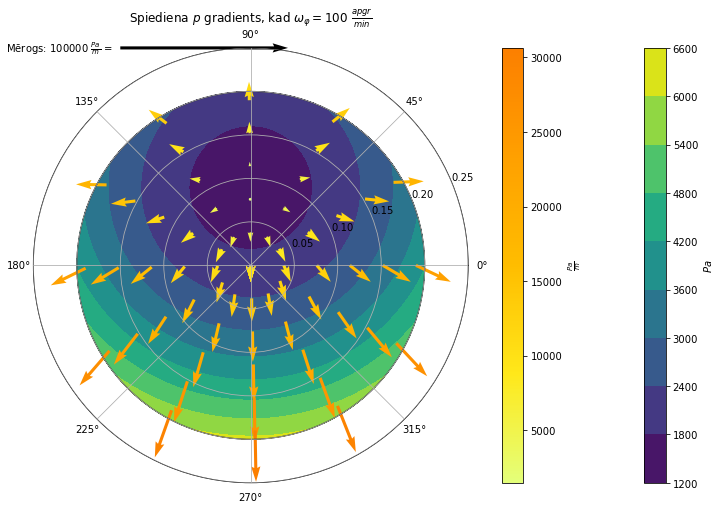

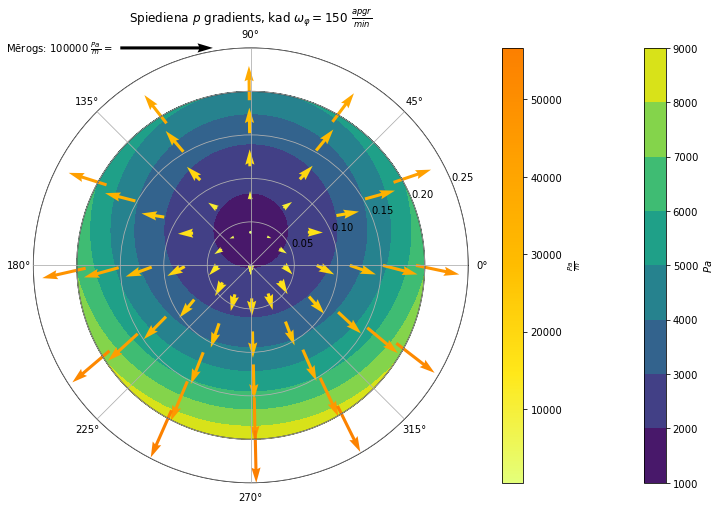

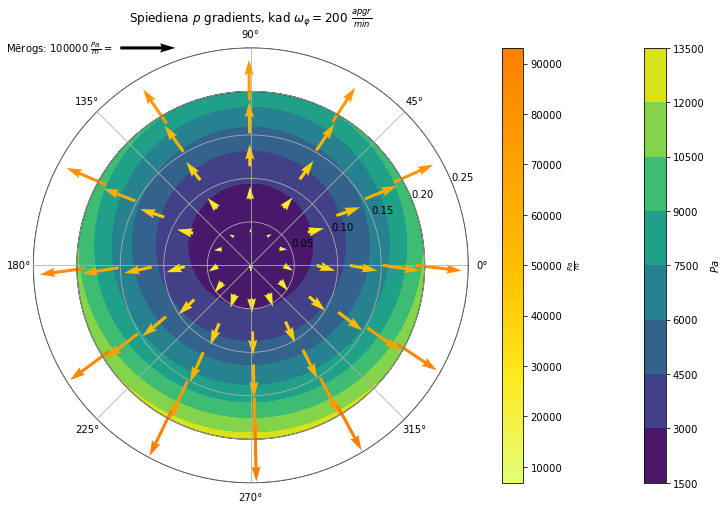

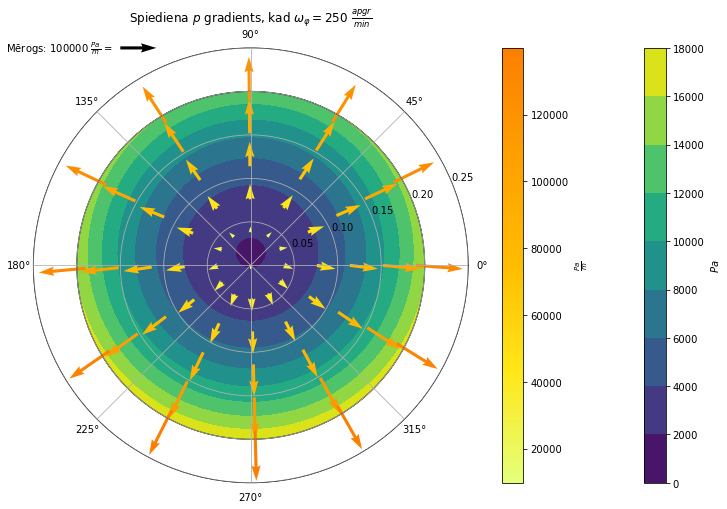

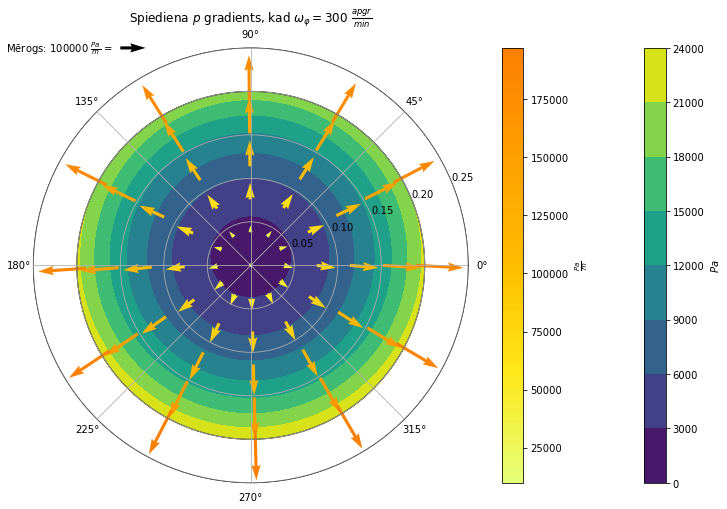

In [6]:
def gradpressure(r, phi, omega):
    """Atgriež spiediena gradientu. Iegūts manuāli atvasinot spiediena sadalījuma formulu."""
    r_komponente = RHO*(omega ** 2 * r - G * np.sin(phi))
    phi_komponente = -RHO*G*np.cos(phi)
    return r_komponente, phi_komponente



for idx, o in enumerate(OMEGA):
    pg_r, pg_phi = gradpressure(r, phi, o)
    pg_x, pg_y = polar_to_cartesian(pg_r, phi, pg_phi)

    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, polar=True)
    ax.set_ylim([0, 0.25])
    ax.grid(True)
    ax.set_axisbelow(True)

    background = True
    if background:
        contour = ax.contourf(phi, r, pressures[idx])
        cbar2 = fig.colorbar(contour)
        cbar2.set_label(r"$Pa$")
        ax.set_axisbelow(False)

    ax.set_title(fr"Spiediena $p$ gradients, kad $\omega_\varphi = {n[idx]} \ \frac{{apgr}}{{min}}$")
    q = ax.quiver(phi[::15, ::15], r[::15, ::15], pg_x[::15, ::15], pg_y[::15, ::15], np.hypot(pg_x[::15, ::15], pg_y[::15, ::15]), cmap="Wistia")

    ax.quiverkey(q, X=0.2, Y=1, U=100_000,
                 label=fr" Mērogs: {100000} $\frac{{Pa}}{{m}}$ =", labelpos='W')

    cbar = fig.colorbar(q)
    cbar.set_label(r"$\frac{Pa}{m}$")

    disk = plt.Circle((0, 0), 0.2, color='black', transform=ax.transData._b, fill=False)
    ax.add_patch(disk)

    plt.show()



## 4. uzdevums

Hidrostatiskā gadījumā ir tāds spiediena sadalījums ir tāds, kādu sagaidām - horizontālā virzienā nemainās, vertikālā virzienā uz leju palielinās. Sākot rotāciju, centrbēdzes neinerciālā spēka dēļ, uz diska sienām sāk pieaugt spiediens un zema spiediena apgabals sāk pārvietoties no augšas uz centru. Beigās spiediens ir radiāli sadalīts, kur centrā spiediens ir vismazākais, bet uz sienām - vislielākais (un lielāks, kāds hidrostatiskajā gadījumā bija maksimālais spiediens diska apakšā.)

Hidrostatiskā gadījumā, burbulītis pacelsies no apakšas uz augšu (2. attēls). Sākoties rotācijai, burbulītis tiktu "aizrauts līdzi" un notiktu spirālveida kustība, līdz burbulītis atdutros pret sienu. Pie ļoti lielas rotācijas, burbulītis nevis atdurtos pret sienu, bet gan nokļūtu vidū, zemāka spiediena apgabalā (4. attēls), taču nav iespējams precīzi pateikt, kāda ir ātruma kritiskā vērtība, lai burbulītis nokļūtu vidū, nevis atdurtos pret sienu un vai tas šajā gadījumā, kad $\omega_{max} = 300 \frac{apgr.}{min}$, vispār notiktu. 

<center><img src="2att.png" alt="2. attēls" width="500"/></center>
<p style="text-align:center">2. attēls</p>


<center><img src="3att.png" alt="3. attēls" width="500"/></center>
<p style="text-align:center">3. attēls</p>



<center><img src="4att.png" alt="4. attēls" width="500"/></center>
<p style="text-align:center">4. attēls</p>